In [1]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the train.csv as df
df = pd.read_csv("train.csv")

In [3]:
# First and Fast Rows of the dataset 
df.head(-5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733


In [4]:
# chicking data shape
df.shape

(1338, 7)

In [5]:
# information about datafram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
#Chicking any null vlaues
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# seprating obj and num 
cat_data = []
num_data = []

for i,c in enumerate(df.dtypes):
    if c == object:
        cat_data.append(df.iloc[:, i])
    else :
        num_data.append(df.iloc[:, i])

In [9]:
# Truning list to dataframe
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [10]:
#num dataframe
num_data.head()

,age,bmi,children,charges
0,19.0,27.900,0.0,16884.92400
1,18.0,33.770,1.0,1725.55230
2,28.0,33.000,3.0,4449.46200
3,33.0,22.705,0.0,21984.47061
4,32.0,28.880,0.0,3866.85520


In [11]:
# cat dataframe
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [12]:
# Printing all unique value in objects
print("sex unique values: ",cat_data["sex"].unique())
print("smoker unique values: ",cat_data["smoker"].unique())
print("region unique values: ",cat_data["region"].unique())

sex unique values:  ['female' 'male']
smoker unique values:  ['yes' 'no']
region unique values:  ['southwest' 'southeast' 'northwest' 'northeast']


In [13]:
datamapping = {'sex':    {"female":0, "male": 1},
               'smoker': {"yes":0, "no": 1},
               'region': {"southwest":0,"southeast":1, "northwest":2 ,"northeast":3}}
df = df.replace(datamapping)

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


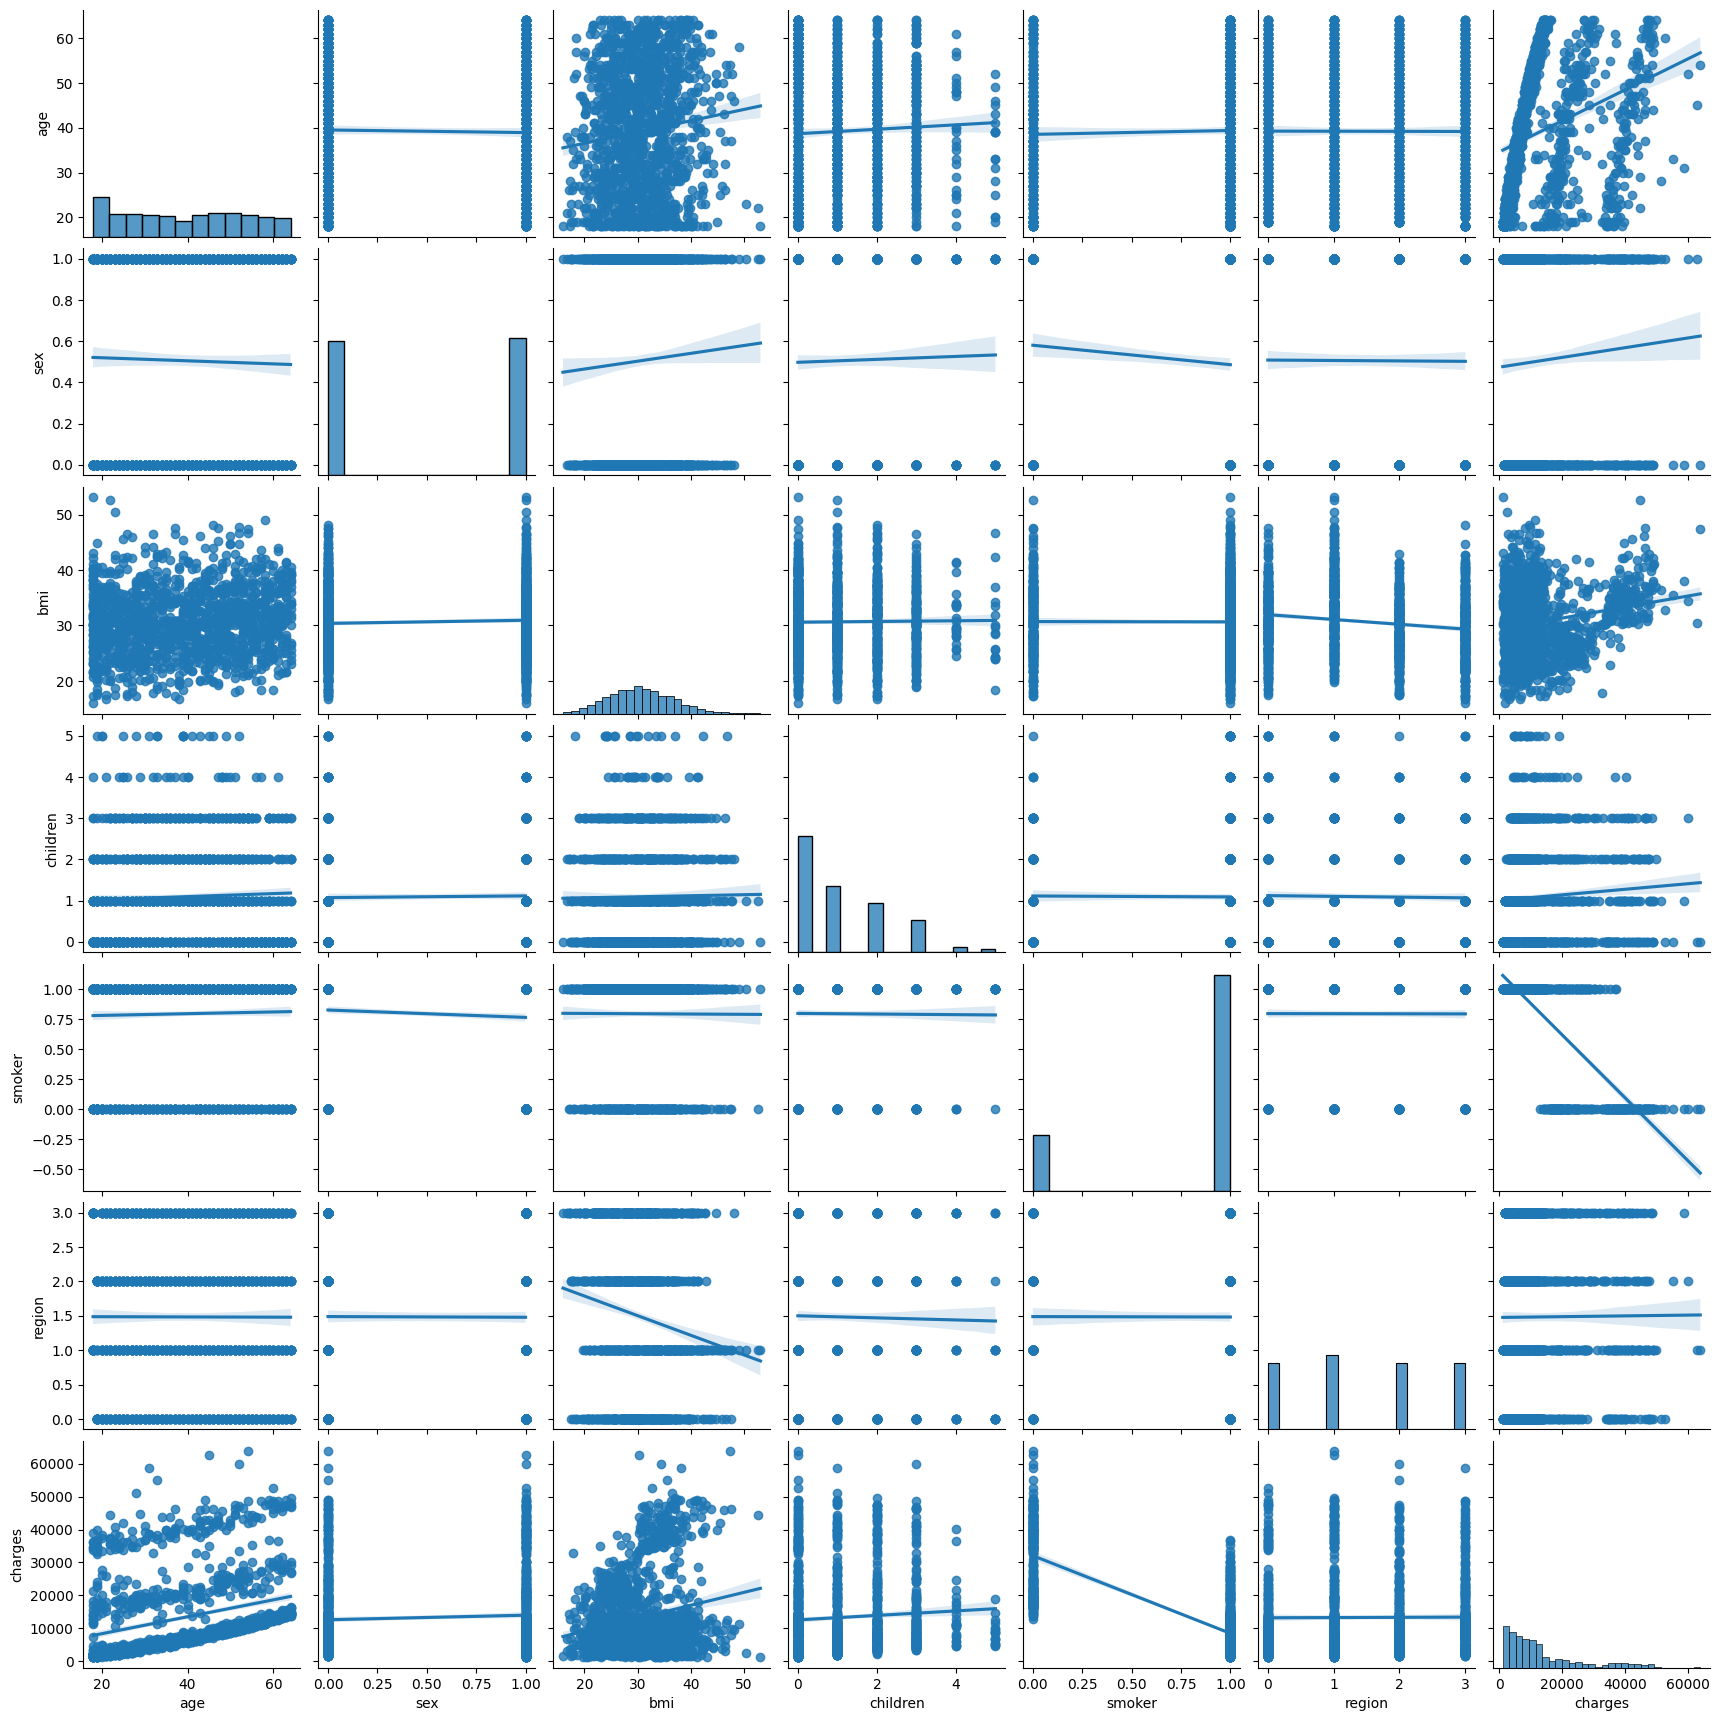

In [29]:
sns.pairplot(df,kind='reg')

In [17]:
X = df.drop('charges', axis = 1)
Y = df['charges']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
li = LinearRegression()
model = li.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4013.6929857811983
Mean Squared Error 33311355.281859953
